In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [41]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [42]:
data.drop(['Age', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], axis=1, inplace=True)
data.head()

,Glucose,Outcome
0,148,1.0
1,85,0.0
2,183,1.0
3,89,0.0
4,137,1.0


In [43]:
data = data.dropna()
data.head()

,Glucose,Outcome
0,148,1.0
1,85,0.0
2,183,1.0
3,89,0.0
4,137,1.0


In [44]:
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2)

model.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(x_test)

print("predicted")
print(y_pred[:5])
print("actual")
print(y_test[:5])

predicted
[1. 1. 0. 0. 0.]
actual
53     1.0
160    0.0
268    0.0
621    0.0
735    0.0
Name: Outcome, dtype: float64


C:\Users\Maitri P\AppData\Local\Temp\ipykernel_7032\437530044.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5])


In [46]:
from sklearn.metrics import matthews_corrcoef

accuracy = accuracy_score(y_pred, y_test)
print(f"accuracy = {accuracy}")

f1 = f1_score(y_pred, y_test)
print(f"f1 = {f1}")

recall = recall_score(y_pred, y_test)
print(f"recall = {recall}")

precision = precision_score(y_pred, y_test)
print(f"precision = {precision}")

matthew = matthews_corrcoef(y_pred, y_test)
print(f"matthew = {matthew}")

accuracy = 0.7337662337662337
f1 = 0.4938271604938272
recall = 0.625
precision = 0.40816326530612246
matthew = 0.33736824125986253


<AxesSubplot: >

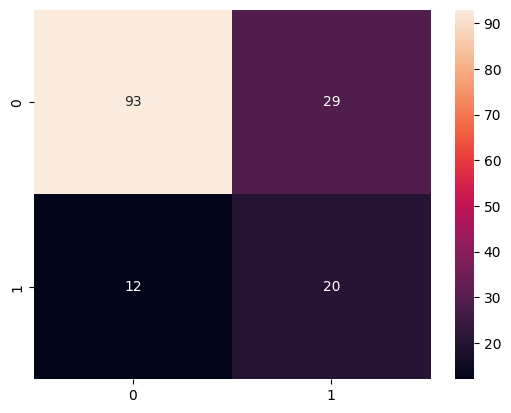

In [53]:
cm = confusion_matrix(y_pred, y_test, labels=[0, 1])
sns.heatmap(cm, annot=True, color='Blue')